# Double Pendulum

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib ipympl

## Numerical integration

In [2]:
def solve_double_pendulum(y0, t_span, t_eval, m1=1, m2=1, l1=1, l2=1, g=9.81):
  def y_prime(t, y):
    theta_1, theta_1_prime, theta_2, theta_2_prime = y

    theta_2_prime_prime = (
      (
        (m1 + m2) / (m2 * l2) *
        (g * (np.sin(theta_2) - np.sin(theta_1) * np.cos(theta_1 - theta_2)) - (l1 * ((theta_1_prime) ** 2) * np.sin(theta_1 - theta_2))) -
        1 / 2 * (theta_2_prime ** 2) * np.sin(2 * (theta_1 - theta_2))
      ) / (np.cos(theta_1 - theta_2) ** 2 - (m1 + m2) / m2)
    )

    theta_1_prime_prime = (
      (theta_1_prime ** 2) * np.tan(theta_1 - theta_2) -
      (g * np.sin(theta_2) + l2 * theta_2_prime_prime) / (l1 * np.cos(theta_1 - theta_2))
    )

    out = [
      theta_1_prime,
      theta_1_prime_prime,
      theta_2_prime,
      theta_2_prime_prime,
    ]

    # print(out)
    return out

  return scipy.integrate.solve_ivp(y_prime,
                                   t_span=t_span,
                                   t_eval=t_eval,
                                   y0=y0,
                                   method="RK45",
                                   atol=1e-10)

## Plotting

In [3]:
def plot_soln(soln, t_eval):
  theta_1, theta_1_prime, theta_2, theta_2_prime = soln.y
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

  axs[0, 0].set_title("Angular displacement of bob 1")
  axs[0, 0].plot(t_eval, theta_1)

  axs[0, 1].set_title("Angular velocity of bob 1")
  axs[0, 1].plot(t_eval, theta_1_prime)

  axs[1, 0].set_title("Angular displacement of bob 2")
  axs[1, 0].plot(t_eval, theta_2)
  
  axs[1, 1].set_title("Angular velocity of bob 2")
  axs[1, 1].plot(t_eval, theta_2_prime)

In [4]:
t_span = (0, 20)
dt = 1e-2 # interval between times at which solution values are stored
t_eval = np.arange(*t_span, step=dt)

soln_1 = solve_double_pendulum(y0=[3 * np.pi / 4, 0, np.pi / 4, 0],
                               t_span=t_span,
                               t_eval=t_eval)

# plot_soln(soln_1, t_eval)

soln_2 = solve_double_pendulum(y0=[3 * np.pi / 4 + 1e-15, 0, np.pi / 4, 0],
                               t_span=t_span,
                               t_eval=t_eval)

# plot_soln(soln_2, t_eval)

## Animation

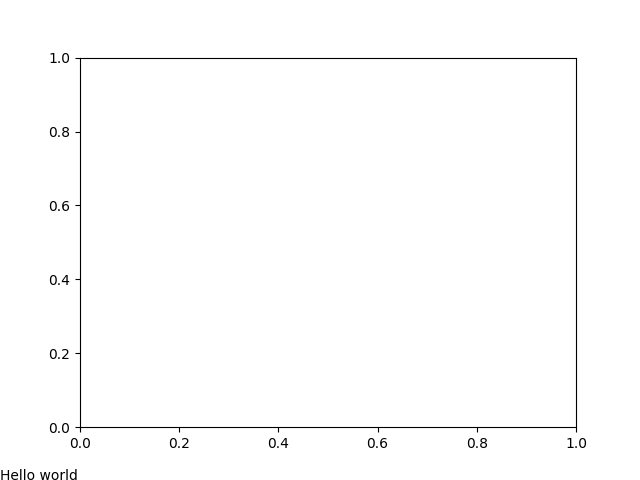

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.

In [ ]:
fig, ax = plt.subplots()

text = plt.annotate("Hello world", (0.5, 0.5), xycoords="figure pixels")

def init_double_pendulum():
  text.set_text("OIWJRDOIJFEIOJFOIEJF")
  # setting axis bounds makes the animation update?? What the fuck??
  # TODO: file issue with matplotlib
  ax.set_xlim(-50, 50)
  ax.set_ylim(-50, 50)


def animate_double_pendulum(frame):
#   global text

  print(frame[0])
  text.set_text(f"t={str(frame)}")

def animate_soln(soln, fig):
  # return FuncAnimation object to prevent it from being garbage-collected
  return FuncAnimation(fig,
                       func=animate_double_pendulum,
                       init_func=init_double_pendulum,
                       frames=zip(soln.t, soln.y.T),
                       interval=dt*1000,
                       repeat=True,
                       blit=False)

animation = animate_soln(soln_1, fig)
plt.show()

In [10]:
list(zip(soln_1.t, soln_1.y.T))

[(0.0, array([2.35619449, 0.        , 0.78539816, 0.        ])),
 (0.01, array([ 2.35584761, -0.06938323,  0.78505139, -0.06934311])),
 (0.02, array([ 2.35480651, -0.13886254,  0.78401178, -0.13854169])),
 (0.03, array([ 2.35307057, -0.20852671,  0.78228329, -0.2074385 ])),
 (0.04, array([ 2.35063846, -0.27846223,  0.77987199, -0.27587217])),
 (0.05, array([ 2.34750564, -0.34877246,  0.77678077, -0.34371156])),
 (0.06, array([ 2.34366689, -0.41955581,  0.77301438, -0.41081858])),
 (0.07, array([ 2.33911641, -0.49090516,  0.7685796 , -0.477047  ])),
 (0.08, array([ 2.33384784, -0.5629078 ,  0.76348524, -0.54224251])),
 (0.09, array([ 2.32785422, -0.63564544,  0.75774218, -0.60624267])),
 (0.1, array([ 2.32112802, -0.70919423,  0.75136329, -0.66887694])),
 (0.11, array([ 2.31366115, -0.78362476,  0.74436352, -0.72996667])),
 (0.12, array([ 2.30544491, -0.85900202,  0.73675982, -0.78932507])),
 (0.13, array([ 2.29647004, -0.93538544,  0.72857119, -0.84675728])),
 (0.14, array([ 2.2867267 

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 4046
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.997e+01, 4.998e+01,
       4.999e+01])
 t_events: None
        y: array([[ 2.35619449e+00,  2.35584761e+00,  2.35480651e+00, ...,
         2.45122480e+01,  2.45033111e+01,  2.44909000e+01],
       [ 0.00000000e+00, -6.93832251e-02, -1.38862543e-01, ...,
        -7.17945284e-01, -1.06861810e+00, -1.41266415e+00],
       [ 7.85398163e-01,  7.85051388e-01,  7.84011783e-01, ...,
         1.03781152e+02,  1.03877564e+02,  1.03971930e+02],
       [ 0.00000000e+00, -6.93431086e-02, -1.38541692e-01, ...,
         9.75872463e+00,  9.53099338e+00,  9.35038399e+00]])
 y_events: None


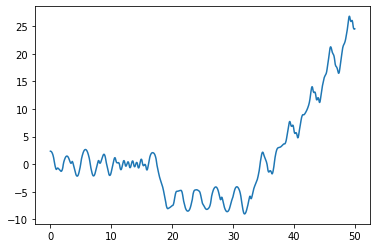

In [33]:
m1 = 1
m2 = 1
l1 = 1
l2 = 1
g = 9.81

def y_prime(t, y):
  theta_1, theta_1_prime, theta_2, theta_2_prime = y

  theta_2_prime_prime = (
    (
      (m1 + m2) / (m2 * l2) *
      (g * (np.sin(theta_2) - np.sin(theta_1) * np.cos(theta_1 - theta_2)) - (l1 * ((theta_1_prime) ** 2) * np.sin(theta_1 - theta_2))) -
      1 / 2 * (theta_2_prime ** 2) * np.sin(2 * (theta_1 - theta_2))
    ) / (np.cos(theta_1 - theta_2) ** 2 - (m1 + m2) / m2)
  )

  theta_1_prime_prime = (
    (theta_1_prime ** 2) * np.tan(theta_1 - theta_2) -
    (g * np.sin(theta_2) + l2 * theta_2_prime_prime) / (l1 * np.cos(theta_1 - theta_2))
  )

  out = [
    theta_1_prime,
    theta_1_prime_prime,
    theta_2_prime,
    theta_2_prime_prime,
  ]

  # print(out)
  return out

t_span = (0, 50)
t_eval = np.arange(*t_span, step=1e-2)
y0 = [3 * np.pi / 4, 0, np.pi / 4, 0]

soln = scipy.integrate.solve_ivp(y_prime,
                                 t_span=t_span,
                                 t_eval=t_eval,
                                 y0=y0,
                                 method="RK45",
                                 atol=1e-10)
print(soln)

theta_1, theta_1_prime, theta_2, theta_2_prime = soln.y
plt.plot(t_eval, theta_1)

In [16]:
t_eval

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 9.997e+01, 9.998e+01,
       9.999e+01])